This is simple Workflow in which we are going to access a Node based on a Condition.

This is very Important Because in Future There are many workflows in which we have to make multiple conditional workflows.


## **We Are making workflow to solve quadratic equations**


ax^2 + bx + c =0

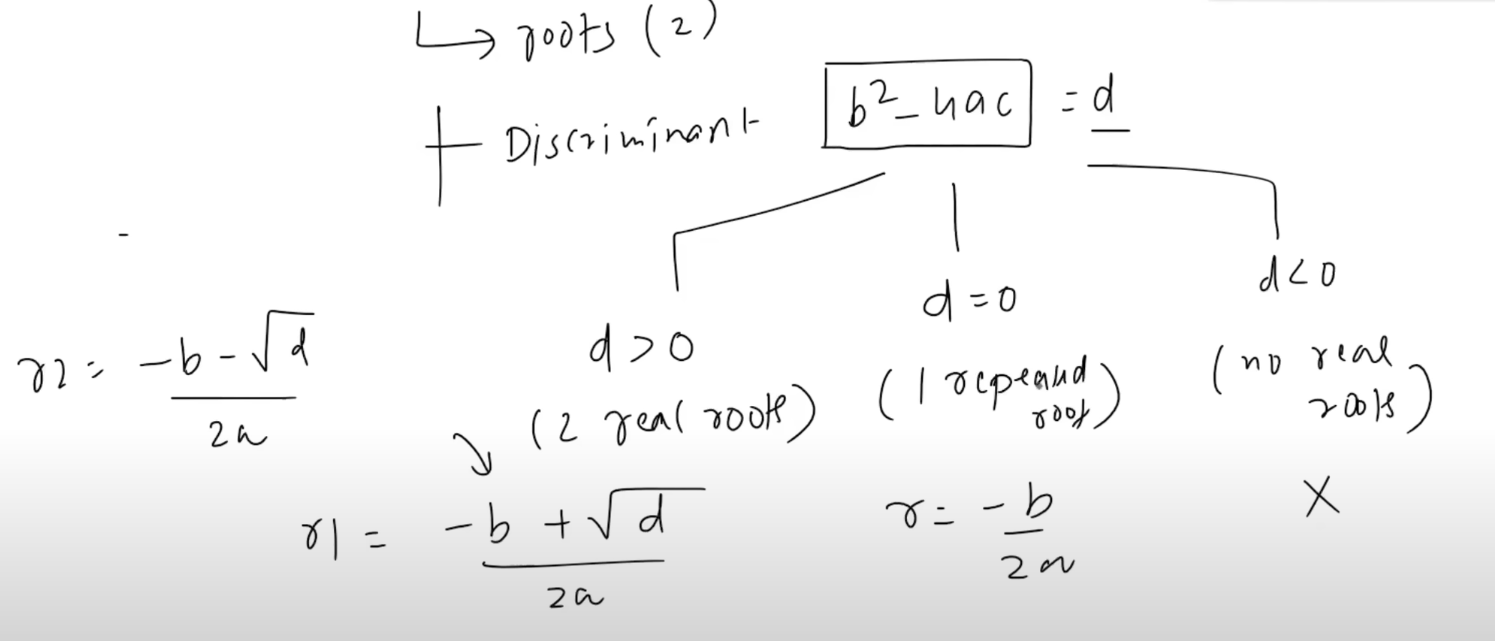


In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    # output
    equation: str
    discriminator: float
    result: str

In [3]:
graph = StateGraph(QuadState)

In [4]:
def get_equation(state: QuadState) -> QuadState:
    equation = f"{state['a']}x2+{state['b']}x+{state['c']}"

    return {"equation": equation}


def get_discriminator(state: QuadState) -> QuadState:
    # b^2 - 4ac
    discriminant = state["b"] ** 2 - (4 * state["a"] * state["c"])

    return {"discriminator": discriminant}

In [5]:
"""
First make first part of the work flow
"""
graph.add_node("show_equation", get_equation)
graph.add_node("calculate_discriminator", get_discriminator)

# Edges for this

graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminator")
# graph.add_edge("calculate_discriminator", END)

In [6]:
test_workflow = graph.compile()

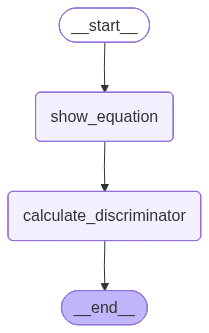

In [7]:
test_workflow

In [8]:
test_state = {
    "a": 3,
    "b": 2,
    "c": 1,
}
test_workflow.invoke(test_state)

{'a': 3, 'b': 2, 'c': 1, 'equation': '3x2+2x+1', 'discriminator': -8}

#### **Now Add Conditional Nodes**


In [9]:
def get_real_roots(state: QuadState) -> QuadState:
    # (-b+Root(discriminat))/2a

    root1 = (-state["b"] - (state["discriminator"] ** 0.5)) / 2 * state["a"]

    root2 = (-state["b"] + (state["discriminator"] ** 0.5)) / 2 * state["a"]

    result = f"The roots are {root1} & {root2}"

    return {"result": result}

In [10]:
def get_repeated(state: QuadState) -> QuadState:
    # (-b+Root(discriminat))/2a

    root1 = (-state["b"] - (state["discriminator"] ** 0.5)) / 2 * state["a"]

    root2 = (-state["b"] + (state["discriminator"] ** 0.5)) / 2 * state["a"]

    result = f"The roots are {root1} & {root2}"

    return {"result": result}

In [11]:
def no_root(state: QuadState) -> QuadState:
    result = "No real Roots"

    return {"result": result}

To be honest we dont need repeated roots node because we are using the same formula and with real roots you can get the same result so We can comment that but for practice i need three conditions


In [12]:
# Creating Conditional Nodes
graph.add_node("real_roots", get_real_roots)
graph.add_node("repeated_roots", get_repeated)
graph.add_node("no_roots", no_root)

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


Now we need to create a function to check conditions and create condition function


In [ ]:
def check_condition(
    state: QuadState,
) -> Literal["real_roots", "repeated_roots", "no_roots"]:
    """This function will give the output of the node name"""

    if state["discriminator"] > 0:
        return "real_roots"
    elif state["discriminator"] == 0:
        return "repeated_roots"
    else:
        return "no_roots"

In [21]:
# Just for safer side create another graph with all new condition and edges

graph2 = StateGraph(QuadState)

# Add nodes
graph2.add_node("show_equation", get_equation)
graph2.add_node("calculate_discriminator", get_discriminator)
# Creating Conditional Nodes
graph2.add_node("real_roots", get_real_roots)
graph2.add_node("repeated_roots", get_repeated)
graph2.add_node("no_roots", no_root)


# Creating Edges
graph2.add_edge(START, "show_equation")
graph2.add_edge("show_equation", "calculate_discriminator")

"""
Now here we need to add edges for conditions which we will get from check condition.
And based on the check condition we will get the node
and then connect to end
"""

graph2.add_conditional_edges("calculate_discriminator", check_condition)

graph2.add_edge("real_roots", END)
graph2.add_edge("repeated_roots", END)
graph2.add_edge("no_roots", END)

In [22]:
conditional_workflow = graph2.compile()

In [29]:
# conditional_workflow


In [26]:
initial_num = {
    "a": 2,
    "b": 6,
    "c": 4,
}

conditional_workflow.invoke(initial_num)

{'a': 2,
 'b': 6,
 'c': 4,
 'equation': '2x2+6x+4',
 'discriminator': 4,
 'result': 'The roots are -8.0 & -4.0'}

In [27]:
num = {
    "a": 2,
    "b": 2,
    "c": 6,
}

conditional_workflow.invoke(num)

{'a': 2,
 'b': 2,
 'c': 6,
 'equation': '2x2+2x+6',
 'discriminator': -44,
 'result': 'No real Roots'}

In [28]:
num = {
    "a": 2,
    "b": 4,
    "c": 2,
}

conditional_workflow.invoke(num)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x2+4x+2',
 'discriminator': 0,
 'result': 'The roots are -4.0 & -4.0'}

> SO in nutshell we only need to create a condition function which will give the Next Node name based on the condition and this conditional edge is created using `add_conditional_edge` method
